In [21]:
import pandas as pd
import numpy as np
#import cufflinks as cf
import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных


In [13]:
taps = pd.read_csv('data.csv', delimiter = ',')
taps.head()

,datetime,price,volume,sumVolume,bid,ask,tickId,basis,tradeMarketCenter,TradeConditions,TradeAggressor,ecn,Unnamed: 12
0,2020-03-16 04:00:00.017723,253.20,2771,2771,252.41,253.2,808464454,E,11,1747,0,16,NaN
1,2020-03-16 04:00:00.021236,262.75,300,3071,252.41,253.2,808731993,E,5,173D,0,16,NaN
2,2020-03-16 04:00:00.022473,253.20,600,3671,252.41,253.2,808464455,E,11,173D,0,16,NaN
3,2020-03-16 04:00:00.023496,258.84,300,3971,252.41,253.2,808731994,E,5,173D,0,16,NaN
4,2020-03-16 04:00:00.690195,253.20,10,3981,252.41,253.2,808732012,O,5,873D17,0,16,NaN


In [36]:
taps['hour'] = pd.DatetimeIndex(taps['datetime']).hour

In [37]:
taps.head()

,datetime,price,volume,sumVolume,bid,ask,tickId,basis,tradeMarketCenter,TradeConditions,TradeAggressor,ecn,Unnamed: 12,hour,minute,time
0,2020-03-16 04:00:00.017723,253.20,2771,2771,252.41,253.2,808464454,E,11,1747,0,16,NaN,4,0,04:00:00.017723
1,2020-03-16 04:00:00.021236,262.75,300,3071,252.41,253.2,808731993,E,5,173D,0,16,NaN,4,0,04:00:00.021236
2,2020-03-16 04:00:00.022473,253.20,600,3671,252.41,253.2,808464455,E,11,173D,0,16,NaN,4,0,04:00:00.022473
3,2020-03-16 04:00:00.023496,258.84,300,3971,252.41,253.2,808731994,E,5,173D,0,16,NaN,4,0,04:00:00.023496
4,2020-03-16 04:00:00.690195,253.20,10,3981,252.41,253.2,808732012,O,5,873D17,0,16,NaN,4,0,04:00:00.690195


In [40]:
taps2 = pd.read_csv('data.csv', delimiter = ',', index_col=0)
taps2.head()

,price,volume,sumVolume,bid,ask,tickId,basis,tradeMarketCenter,TradeConditions,TradeAggressor,ecn,Unnamed: 12
datetime,,,,,,,,,,,,
2020-03-16 04:00:00.017723,253.20,2771,2771,252.41,253.2,808464454,E,11,1747,0,16,NaN
2020-03-16 04:00:00.021236,262.75,300,3071,252.41,253.2,808731993,E,5,173D,0,16,NaN
2020-03-16 04:00:00.022473,253.20,600,3671,252.41,253.2,808464455,E,11,173D,0,16,NaN
2020-03-16 04:00:00.023496,258.84,300,3971,252.41,253.2,808731994,E,5,173D,0,16,NaN
2020-03-16 04:00:00.690195,253.20,10,3981,252.41,253.2,808732012,O,5,873D17,0,16,NaN


### Посмотрим как себя ведёт переменная volume

In [23]:
taps['volume'].describe()

count    2.147738e+06
mean     1.383966e+02
std      3.830150e+03
min      0.000000e+00
25%      1.300000e+01
50%      9.100000e+01
75%      1.000000e+02
max      3.399842e+06
Name: volume, dtype: float64

In [41]:
volume2 = taps2.volume
volume2.head()

datetime
2020-03-16 04:00:00.017723    2771
2020-03-16 04:00:00.021236     300
2020-03-16 04:00:00.022473     600
2020-03-16 04:00:00.023496     300
2020-03-16 04:00:00.690195      10
Name: volume, dtype: int64

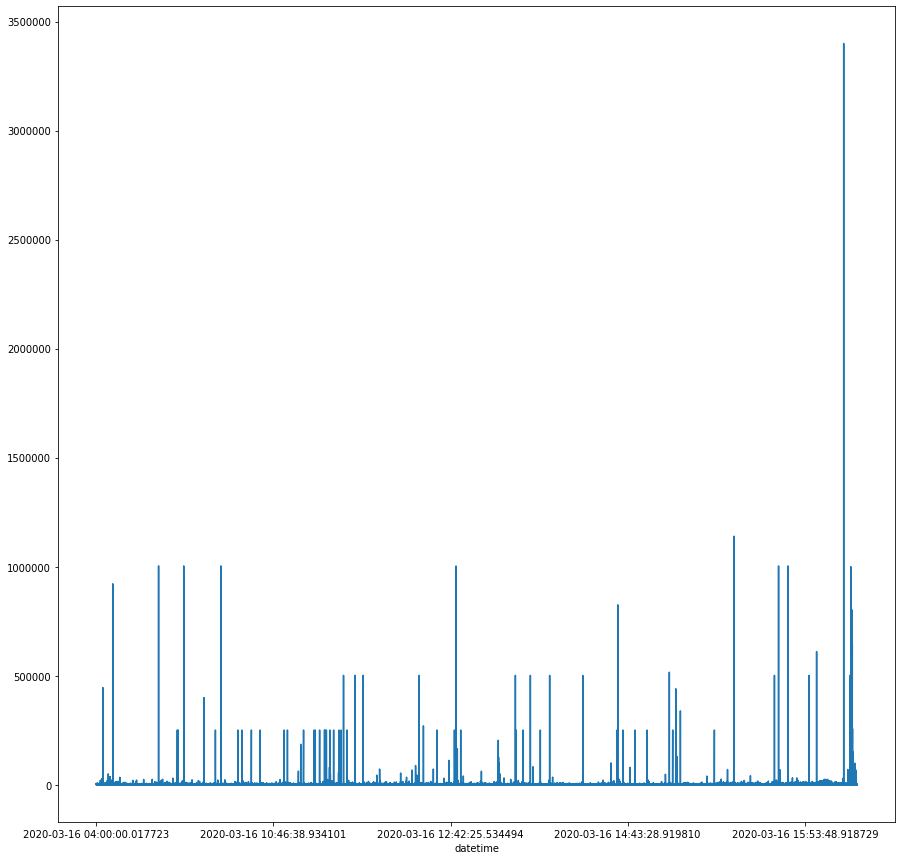

In [43]:
volume2.plot(figsize=(15, 15))

### С графика видно, что значения расбросаны, и под конец дня происходит большой скачок данных. Кроме того, на протяжении всего дня также происходят выбросы и значения "скачут"

### Посмотрим как себя ведёт переменная price

In [52]:
taps['price'].describe()

count    2.147738e+06
mean     2.476152e+02
std      4.095209e+00
min      2.373600e+02
25%      2.449900e+02
50%      2.476100e+02
75%      2.506900e+02
max      2.788800e+02
Name: price, dtype: float64

In [45]:
price = taps2.price
price.head()

datetime
2020-03-16 04:00:00.017723    253.20
2020-03-16 04:00:00.021236    262.75
2020-03-16 04:00:00.022473    253.20
2020-03-16 04:00:00.023496    258.84
2020-03-16 04:00:00.690195    253.20
Name: price, dtype: float64

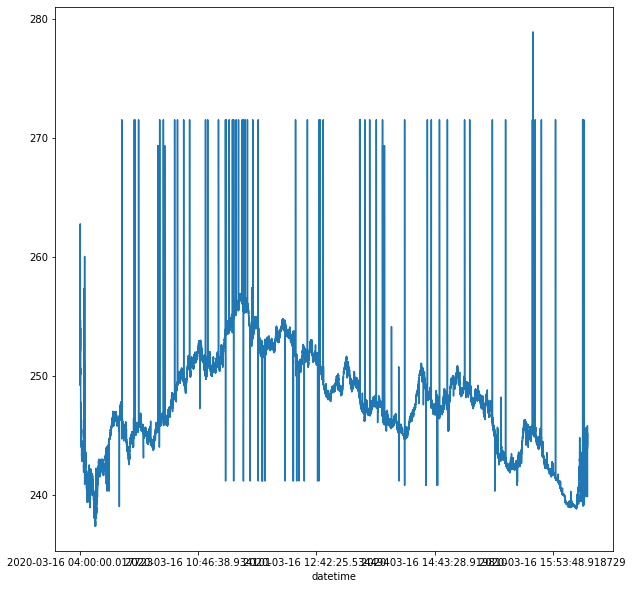

In [48]:
price.plot(figsize=(10, 10))

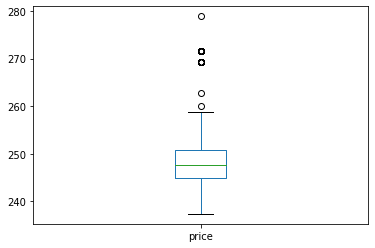

In [47]:
taps['price'].plot(kind='box')
plt.show()

### Видно, что на протяжении дня, есть аномальные расбросы 

### Посмотрим зависимость между количеством shares и часами дня,чтобы выяснить, в котором часу произошёл самый большой выброс

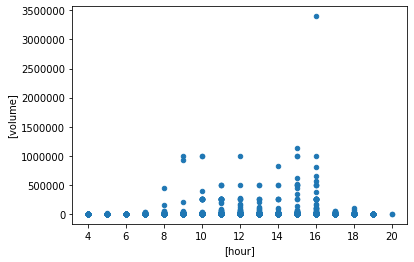

In [44]:
taps.plot(kind = 'scatter', x = ['hour'], y = ['volume'])

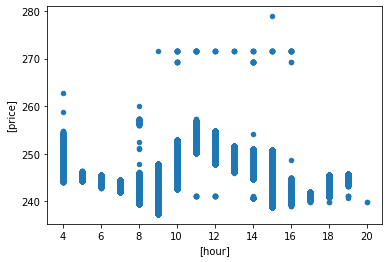

In [49]:
taps.plot(kind = 'scatter', x = ['hour'], y = ['price'])

### Посмотрим на корреляцию между всеми переменными

In [50]:
corr = taps.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

C:\Users\Dasha\AppData\Roaming\Python\Python37\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning:

All-NaN slice encountered

C:\Users\Dasha\AppData\Roaming\Python\Python37\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning:

All-NaN slice encountered



,price,volume,sumVolume,bid,ask,tickId,tradeMarketCenter,TradeAggressor,ecn,Unnamed: 12,hour,minute
price,1.00,0.01,-0.32,1.00,1.00,0.02,0.03,nan,nan,nan,-0.28,-0.25
volume,0.01,1.00,0.01,-0.01,-0.01,0.01,-0.00,nan,nan,nan,0.00,0.00
sumVolume,-0.32,0.01,1.00,-0.31,-0.32,0.18,0.01,nan,nan,nan,0.97,0.16
bid,1.00,-0.01,-0.31,1.00,1.00,0.02,0.03,nan,nan,nan,-0.27,-0.25
ask,1.00,-0.01,-0.32,1.00,1.00,0.02,0.03,nan,nan,nan,-0.28,-0.25
tickId,0.02,0.01,0.18,0.02,0.02,1.00,0.09,nan,nan,nan,0.19,-0.01
tradeMarketCenter,0.03,-0.00,0.01,0.03,0.03,0.09,1.00,nan,nan,nan,0.01,0.01
TradeAggressor,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ecn,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Unnamed: 12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Проверим зависимость цены от показателей ask,bid

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFB95305F8>,
      dtype=object)

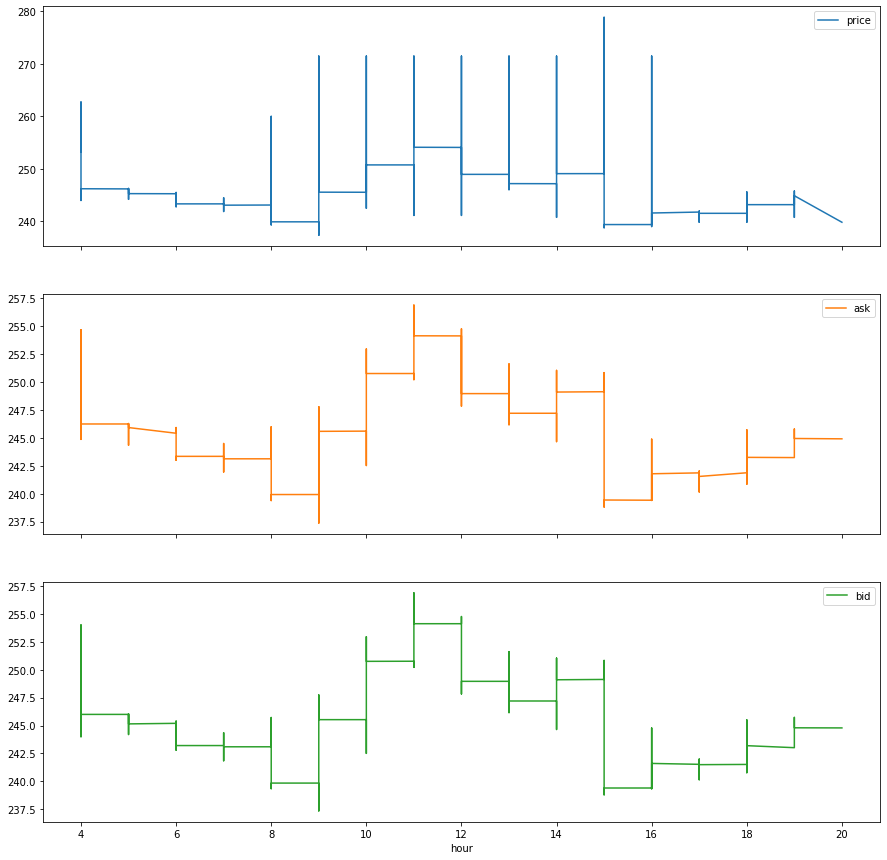

In [32]:
taps.plot(x='hour', y=['price','ask', 'bid'], subplots=True, figsize=(15, 15))